## **Stage 1: Overview of dataset**

In [15]:
## Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

In [16]:
##Download the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [17]:
## Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [18]:
## Print the dimensions of the dataset to gain a better understadning
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


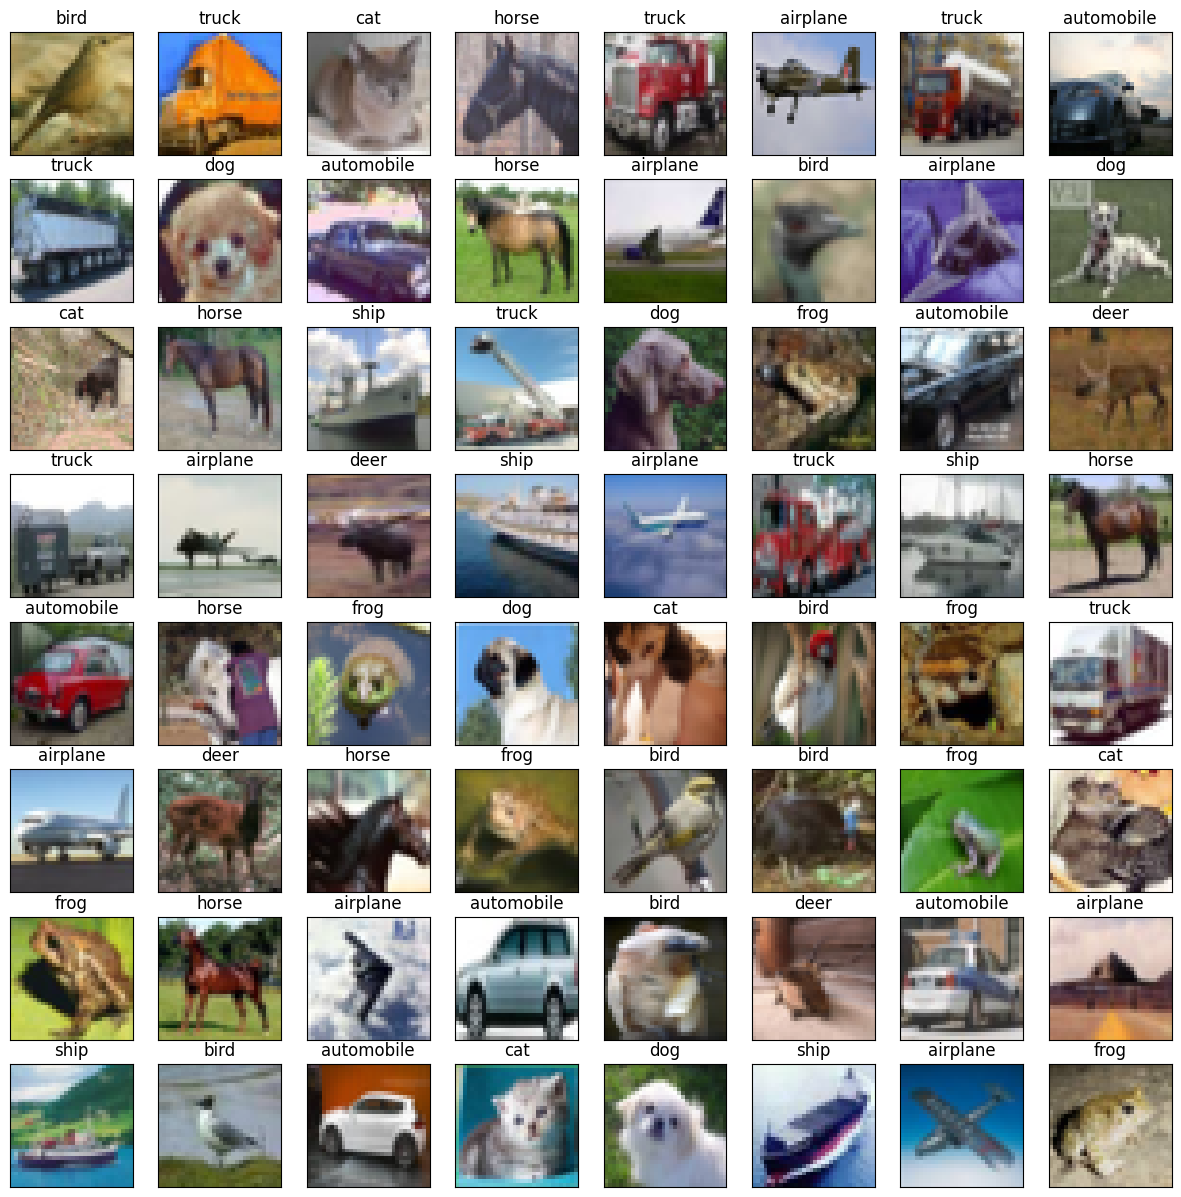

In [19]:
# overview of the cifar-10 dataset
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

## **Stage 2: Preprocessing of dataset**

In [20]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalise the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

In [21]:
#Creating categorical encoding for the "y " data
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

In [22]:
def build_cnn_model(input_shape, num_classes):
    """
    Builds a CNN model with 3 convolutional layers.

    Args:
        input_shape: Tuple representing the input image shape (height, width, channels).
        num_classes: Number of classes for classification.

    Returns:
        A compiled Keras CNN model.
    """

    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))



    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


input_shape = (32, 32, 3)
num_classes = 10

model = build_cnn_model(input_shape, num_classes)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the learning rate
learning_rate = 0.001

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


# Train the model with early stopping, reduced learning rate on plateau, and data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 151s 209ms/step - accuracy: 0.3242 - loss: 1.8430 - val_accuracy: 0.5748 - val_loss: 1.1727 - learning_rate: 0.0010
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - accuracy: 0.5345 - loss: 1.3026 - val_accuracy: 0.6422 - val_loss: 0.9913 - learning_rate: 0.0010
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 137s 195ms/step - accuracy: 0.5935 - loss: 1.1437 - val_accuracy: 0.6736 - val_loss: 0.9255 - learning_rate: 0.0010
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 137s 194ms/step - accuracy: 0.6339 - loss: 1.0543 - val_accuracy: 0.6840 - val_loss: 0.8734 - learning_rate: 0.0010
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 143s 203ms/step - accuracy: 0.6606 - loss: 0.9717 - val_accuracy: 0.6962 - val_loss: 0.8633 - learning_rate: 0.0010
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - accuracy: 0.6732 - loss: 0.9371 - val_accuracy: 0.7272 - val_loss: 0.7955 - learning_rate: 0.0010
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 155s 220ms/step -

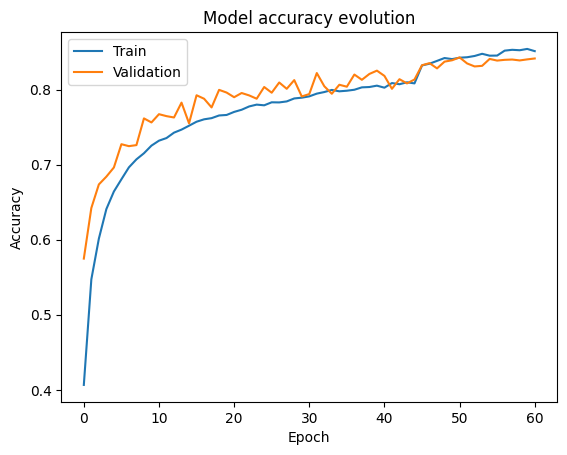

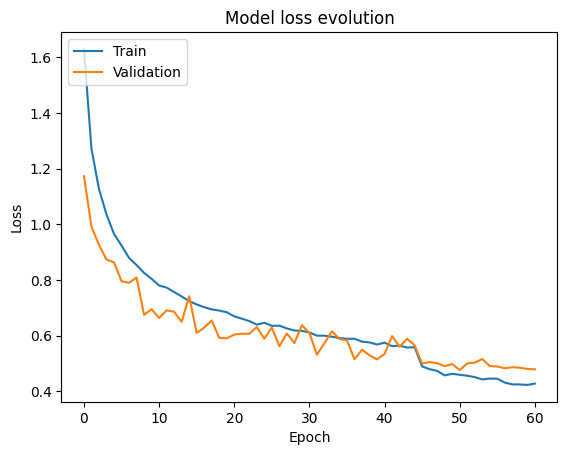

In [24]:
#Generating plots for visualising the training and validation loss, and accuracy evolution over epochs using model history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8335 - loss: 0.5227

Test Accuracy: 0.8342000246047974
Test Loss:     0.5210677981376648


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.90      0.94      0.92      1000
           2       0.82      0.72      0.77      1000
           3       0.76      0.60      0.67      1000
           4       0.80      0.83      0.82      1000
           5       0.78      0.73      0.76      1000
           6       0.79      0.93      0.85      1000
           7       0.85      0.88      0.87      1000
           8       0.92      0.91      0.91      1000
           9       0.87      0.92      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



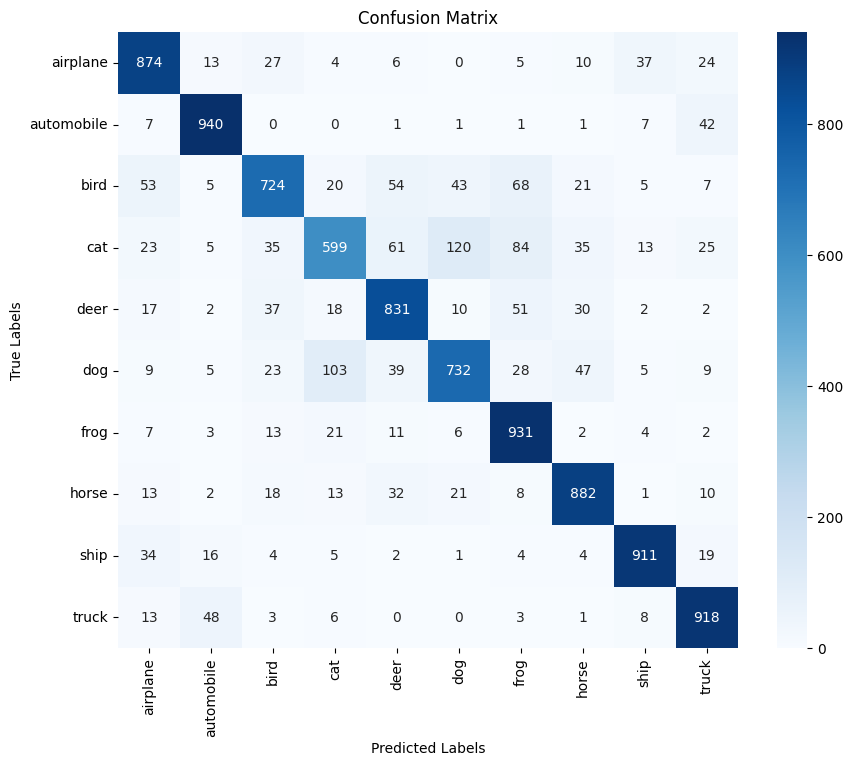

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: truck
Prediction probabilities: [[1.7083718e-01 3.2878470e-01 7.3610392e-04 3.3028942e-04 1.8185139e-05
  4.9403305e-05 6.2786890e-03 8.0289108e-05 2.9534927e-02 4.6335021e-01]]


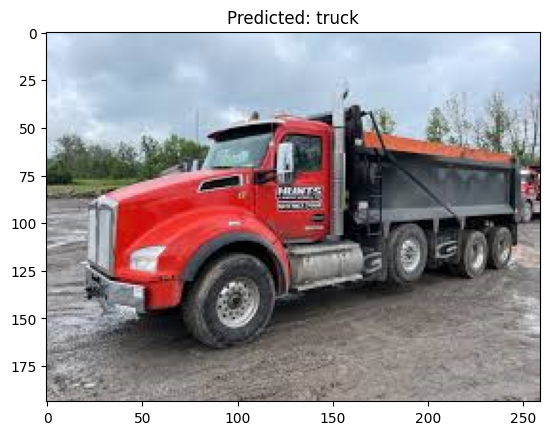

In [29]:
# Load the saved model
url = "https://raw.githubusercontent.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/master/truck_sample.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Function to preprocess the image
def preprocess_image(image):
    img = cv2.resize(image, (32, 32))
    # Convert the image to RGB if it has an alpha channel
    if img.shape[2] == 4:
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    img = img.astype('float32')
    mean = np.mean(img)
    std = np.std(img)
    img = (img - mean) / (std + 1e-7)
    img = np.expand_dims(img, axis=0)
    return img


preprocessed_image = preprocess_image(image)

# Make prediction
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_name = class_names[predicted_class]

print(f"Predicted class: {predicted_class_name}")
print(f"Prediction probabilities: {prediction}")

# Optionally, display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predicted_class_name}")
plt.show()